### Unit 4 Home Work Assignment: Pandas

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
%matplotlib inline

#### Reading the input CSV files

In [204]:
# importing data
csvpath1 = Path('C:/Users/Endalkachew Desta/downloads/Resources/aapl_historical.csv')
csvpath2 = Path('C:/Users/Endalkachew Desta/downloads/Resources/algo_returns.csv')
csvpath3 = Path('C:/Users/Endalkachew Desta/downloads/Resources/cost_historical.csv')
csvpath4 = Path('C:/Users/Endalkachew Desta/downloads/Resources/goog_historical.csv')
csvpath5 = Path('C:/Users/Endalkachew Desta/downloads/Resources/sp500_history.csv')
csvpath6 = Path('C:/Users/Endalkachew Desta/downloads/Resources/whale_returns.csv')

In [205]:
# reading the data
aapl_hist_data = pd.read_csv(csvpath1)
algo_return_data = pd.read_csv(csvpath2)
cost_hist_data = pd.read_csv(csvpath3)
goog_hist_data = pd.read_csv(csvpath4)
sp500_his_data = pd.read_csv(csvpath5)
whale_returns_data = pd.read_csv(csvpath6)

In [206]:
# to data frame
df1 = pd.DataFrame(aapl_hist_data)
df2 = pd.DataFrame(algo_return_data)
df3 = pd.DataFrame(cost_hist_data)
df4 = pd.DataFrame(goog_hist_data)
df5 = pd.DataFrame(sp500_his_data)
df6 = pd.DataFrame(whale_returns_data)
df6.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


### Setting the datetime index

In [207]:
# formatting the date time and assigning the index
df1['DateTime'] = pd.to_datetime(df1['Trade DATE'])
df2['DateTime'] = pd.to_datetime(df2['Date'])
df3['DateTime'] = pd.to_datetime(df3['Trade DATE'])
df4['DateTime'] = pd.to_datetime(df4['Trade DATE'])
df5['DateTime'] = pd.to_datetime(df5['Date'])
df6['DateTime'] = pd.to_datetime(df6['Date'])

df1 = df1.set_index(['DateTime'])
df2 = df2.set_index(['DateTime'])
df3 = df3.set_index(['DateTime'])
df4 = df4.set_index(['DateTime'])
df5 = df5.set_index(['DateTime'])
df6 = df6.set_index(['DateTime'])

del df1['Trade DATE']
del df2['Date']
del df3['Trade DATE']
del df4['Trade DATE']
del df5['Date']
del df6['Date']
df6.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
DateTime,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


#### Removing the dollar sign from df5 and setting the data type to float


In [208]:
# removing $ sign
df5['Close'] = df5['Close'].str.replace('$', '')
df5['Close'] = df5['Close'].astype(float)
df5.head()

,Close
DateTime,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


### Detecting null entries

In [209]:
# locating columns with null entries
df1_null = df1[df1.isnull().any(axis=1)]
df1_null.head()
df2_null = df2[df2.isnull().any(axis=1)]
df2_null.head()
df3_null = df3[df3.isnull().any(axis=1)]
df3_null.head()
df4_null = df4[df4.isnull().any(axis=1)]
df4_null.head()
df5_null = df5[df5.isnull().any(axis=1)]
df5_null.head()
df6_null = df6[df6.isnull().any(axis=1)]
df6_null.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
DateTime,,,,
2015-03-02,NaN,NaN,NaN,NaN


#### Removing rows with null entries

In [210]:
#Clear entries with null imputs
df1 = df1.dropna()
df1 =df1.sort_index()
df2 = df2.dropna()
df2 =df2.sort_index()
df3 = df3.dropna()
df3 =df3.sort_index()
df4 = df4.dropna()
df4 =df4.sort_index()
df5 = df5.dropna()
#df5.reset_index(drop=True)
df6 = df6.dropna()
df6 =df6.sort_index()

#### Convert SP500 data to daily returns format

In [211]:
# changing SP500 data to daily returns
df5['SP500Daily'] = df5.pct_change()

df5 = df5.dropna()
df5.reset_index()

del df5['Close']

df5 = df5.sort_index()

df5.head()

,SP500Daily
DateTime,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


#### Concatinating and sorting Sp500, Algo_Returns and Whale_returns data

In [212]:
# concatinating Whale and Algo data
joined_data=pd.concat([df6, df2, df5],axis='columns',join='inner')

joined_data = joined_data.sort_index()
joined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500Daily
DateTime,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [213]:
# cummulative returns
cum_returns=(joined_data+1).cumprod()
cum_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500Daily
DateTime,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123


#### Plot of the daily returns and the cummulative returns

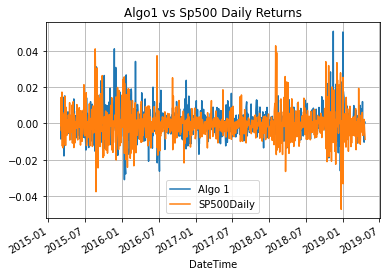

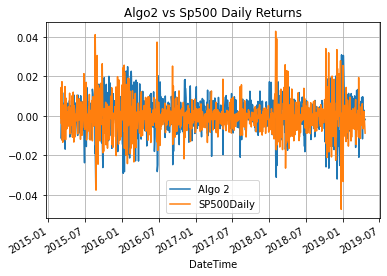

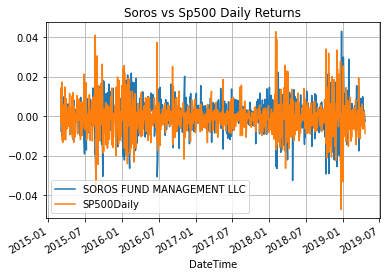

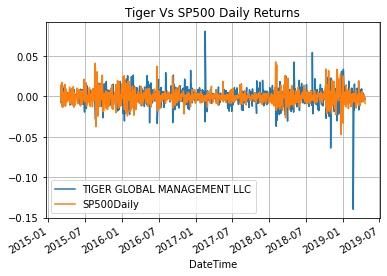

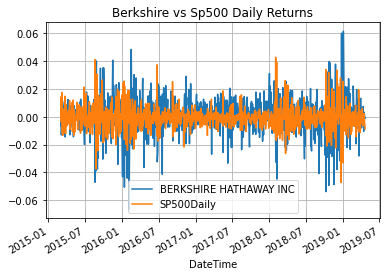

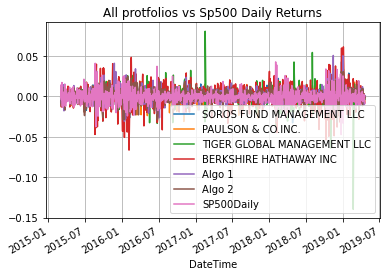

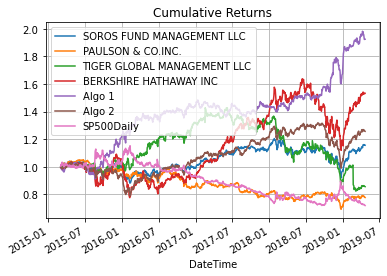

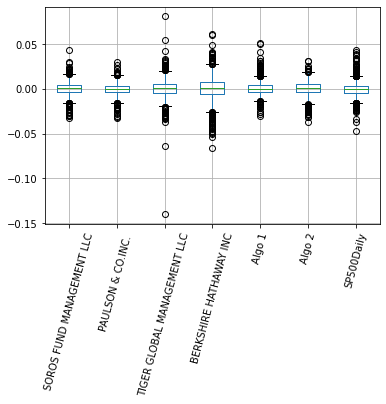

In [214]:
# Plot
import matplotlib.pyplot as plt
joined_data.plot(y = ['Algo 1','SP500Daily'],title='Algo1 vs Sp500 Daily Returns',grid=True)
joined_data.plot(y = ['Algo 2','SP500Daily'],title='Algo2 vs Sp500 Daily Returns',grid=True)
joined_data.plot(y = ['SOROS FUND MANAGEMENT LLC','SP500Daily'],title='Soros vs Sp500 Daily Returns',grid=True)
#joined_data.plot(y = ['PAULSON & CO.INC.','SP500Daily'],title='Paulson vs Sp500 Daily Returns',grid=True)
joined_data.plot(y = ['TIGER GLOBAL MANAGEMENT LLC','SP500Daily'],title='Tiger Vs SP500 Daily Returns',grid=True)
joined_data.plot(y = ['BERKSHIRE HATHAWAY INC','SP500Daily'],title='Berkshire vs Sp500 Daily Returns',grid=True)
joined_data.plot(title='All protfolios vs Sp500 Daily Returns',grid=True)
(joined_data+1).cumprod().plot(grid=True,title='Cumulative Returns')
joined_data.plot.box(grid=True,rot=75)

plt.show()

#### Basic stat info of joined data 

In [215]:
# stat data of the joined data
joined_data.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500Daily
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,0.000171,-0.000217,-0.000089,0.000494,0.000658,0.000254,-0.000281
std,0.007896,0.007026,0.010897,0.012919,0.007623,0.008341,0.008587
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.047250
25%,-0.003641,-0.004044,-0.004792,-0.005655,-0.003257,-0.003799,-0.004456
50%,0.000517,0.000000,0.000313,0.000726,0.000069,0.000698,-0.000450
75%,0.004320,0.003629,0.005233,0.007565,0.003874,0.005226,0.002881
max,0.042977,0.029338,0.080705,0.061341,0.050735,0.030822,0.042730


### Annual Returns

In [216]:
# calculating annual returns
ydata = joined_data.resample('Y').apply(lambda x: x[-1])
Annual_returns = ydata.pct_change()
Annual_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500Daily
DateTime,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,-0.494498,-2.644008,-0.431582,-0.021571,-1.214446,-0.730535,-1.541460
2017-12-31,-2.681559,-1.124398,-0.558570,-0.840066,-1.834985,5.606671,-0.021409
2018-12-31,2.213671,-9.602091,0.483033,-6.598139,1.872131,-2.048299,-0.846155
2019-12-31,-1.366303,-2.287554,-0.108576,-1.190981,-0.900037,-1.337046,5.917372


In [103]:
joined_data.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500Daily                     0.136313
dtype: float64

### Rolling Stat

##### Rolling Standard Deviation

In [217]:
# Rolling std
Rolling_STD = joined_data.rolling(21).std()
null_rolling = Rolling_STD.isnull().sum(axis=0)
null_rolling
Rolling_STD.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500Daily
DateTime,,,,,,,
2019-04-15,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,0.006532
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006571
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006505
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006137
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.004302


##### Rolling Correlation and simple correlation

In [218]:
# Rolling correlation
Rolling_correlat = joined_data.rolling(21).corr(joined_data['SP500Daily'])
Rolling_correlat.tail(50)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500Daily
DateTime,,,,,,,
2019-02-08,0.159864,0.145391,0.073638,0.067624,-0.303156,0.139245,1.0
2019-02-11,0.189893,0.122727,0.085764,0.053455,-0.261272,0.103271,1.0
2019-02-12,0.149368,0.103454,0.092067,0.083293,-0.216448,0.089168,1.0
2019-02-13,0.106779,0.041148,0.125628,0.047564,-0.305167,0.009823,1.0
2019-02-14,0.104964,0.036163,0.174188,0.078763,-0.315981,0.053209,1.0
2019-02-15,0.113992,0.037182,0.200222,0.082748,-0.337371,0.068756,1.0
2019-02-19,0.125574,0.104488,0.266934,0.096825,-0.381417,0.090888,1.0
2019-02-20,0.122397,0.012444,0.179039,0.003224,-0.293792,-0.059292,1.0
2019-02-21,0.162293,0.051715,0.208161,0.037228,-0.290701,-0.039905,1.0


In [219]:
# calculating Simple correlation 
correlat = joined_data.corr()
correlat

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500Daily
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500Daily,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


##### Correlation plot

<AxesSubplot:title={'center':'Rolling STD of W=21'}, xlabel='Time', ylabel='STD'>

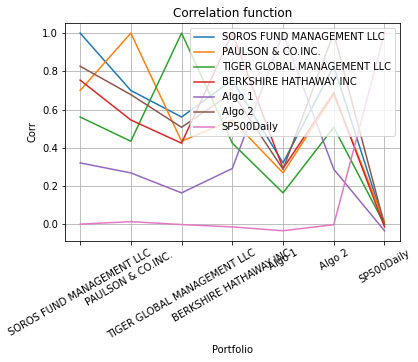

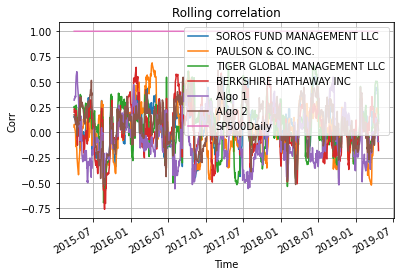

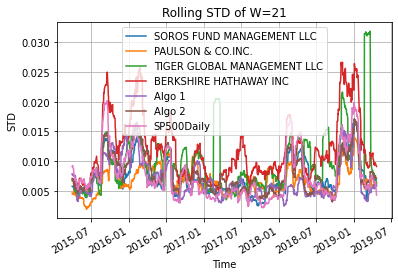

In [220]:
# plot
correlat.plot(grid=True,rot=30,title='Correlation function',xlabel='Portfolio',ylabel='Corr')
Rolling_correlat.plot(grid=True,title='Rolling correlation',xlabel='Time',ylabel='Corr')
Rolling_STD.plot(grid=True,title='Rolling STD of W=21',xlabel='Time',ylabel='STD')

In [108]:
joined_data.columns

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'SP500Daily'],
      dtype='object')

#### Rolling Beta: Rolling Variance 

In [222]:
# calculating rolling variance of SP500
rollingVar = joined_data['SP500Daily'].rolling(60).var()
rollingVar

DateTime
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: SP500Daily, Length: 1042, dtype: float64

#### Rolling Covariance

In [223]:
# calculating rolling covariance
rollingCov = joined_data['Algo 1'].rolling(60).cov(joined_data['SP500Daily'])
rollingCov

DateTime
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.000005
2019-04-16   -0.000004
2019-04-17   -0.000004
2019-04-18   -0.000004
2019-04-22   -0.000004
Length: 1042, dtype: float64

#### Rolling Beta

In [224]:
# calculating rolling beta
rolling_beta = rollingCov/rollingVar
rolling_beta

DateTime
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15   -0.116546
2019-04-16   -0.102774
2019-04-17   -0.101901
2019-04-18   -0.103039
2019-04-22   -0.113498
Length: 1042, dtype: float64

<AxesSubplot:title={'center':'Rolling Beta of W=60'}, xlabel='Time', ylabel='Beta'>

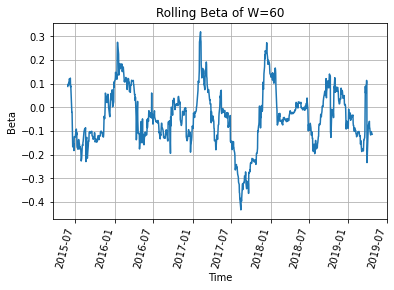

In [225]:
# rolling beta plot
rolling_beta.plot(rot=75,grid=True,title='Rolling Beta of W=60',xlabel='Time',ylabel='Beta')

#### Exponentially Weighted Moving Average

In [226]:
# EWM calculation
ewma = joined_data.ewm(halflife = 21).mean()
ewma.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500Daily
DateTime,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,0.001560
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,0.005975
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,0.003375
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,0.006337


<AxesSubplot:title={'center':'Expo. weighted MA half life=21'}, xlabel='Time'>

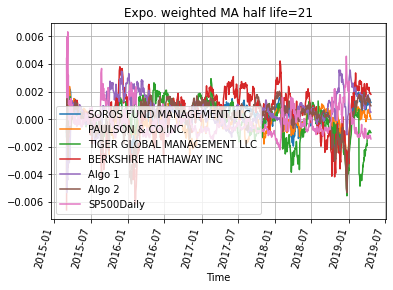

In [227]:
# ewm plot
ewma.plot(rot=75,grid=True,title='Expo. weighted MA half life=21',xlabel='Time')

#### Sharp Ratio

In [228]:
# calculating sharpe ratio
sharpe_ratio = joined_data.mean()/joined_data.std()
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.021600
PAULSON & CO.INC.             -0.030957
TIGER GLOBAL MANAGEMENT LLC   -0.008201
BERKSHIRE HATHAWAY INC         0.038221
Algo 1                         0.086276
Algo 2                         0.030510
SP500Daily                    -0.032668
dtype: float64

<AxesSubplot:xlabel='Portfolio', ylabel='Sharpe Ratio'>

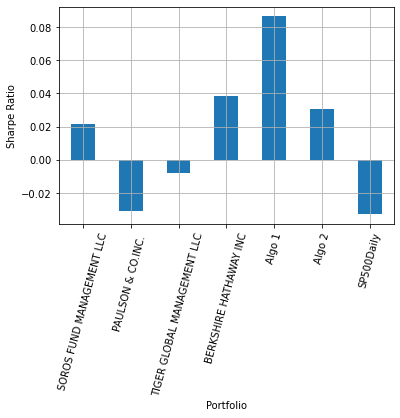

In [229]:
# sharpe ratio bar plot
sharpe_ratio.plot(rot=75,grid=True,kind='bar',xlabel='Portfolio',ylabel='Sharpe Ratio')

####### Algo 1 outperformed all other portfolios and Algo 2 outperformed all but Berkshire Hathaway.

## Custom Portfolio

In [189]:
# Import the data
csvpath7=Path('C:/Users/Endalkachew Desta/Downloads/tsla.csv')
csvpath8=Path('C:/Users/Endalkachew Desta/Downloads/goog.csv')
csvpath9=Path('C:/Users/Endalkachew Desta/Downloads/ual.csv')

In [190]:
#Read the imported data
tsla = pd.read_csv(csvpath7)
goog = pd.read_csv(csvpath8)
ual = pd.read_csv(csvpath9)
#To dataframe
TSLA = pd.DataFrame(tsla)
GOOG = pd.DataFrame(goog)
UAL = pd.DataFrame(ual)
# Date time formatting
TSLA['DateTime'] = pd.to_datetime(TSLA['Date'])
GOOG['DateTime'] = pd.to_datetime(GOOG['Date'])
UAL['DateTime'] = pd.to_datetime(UAL['Date'])

TSLA = TSLA.rename(columns = {"Close":"TSLA_Close"})
GOOG = GOOG.rename(columns = {"Close":"GOOG_Close"})
UAL = UAL.rename(columns = {"Close":"UAL_Close"})

TSLA['DateTime'] = TSLA['DateTime'].apply(lambda x: x.date())
del TSLA['Date']
TSLA = TSLA.set_index(['DateTime'])

GOOG['DateTime'] = GOOG['DateTime'].apply(lambda x: x.date())
del GOOG['Date']
GOOG = GOOG.set_index(['DateTime'])

UAL['DateTime'] = UAL['DateTime'].apply(lambda x: x.date())
del UAL['Date']
UAL = UAL.set_index(['DateTime'])
#concatinating the input data
my_port=pd.concat([TSLA, GOOG, UAL],axis='columns',join='inner')
my_port.head()

,TSLA_Close,GOOG_Close,UAL_Close
DateTime,,,
2014-05-28,42.05,560.14,44.89
2014-05-29,42.05,558.55,44.60
2014-05-30,41.55,558.36,44.37
2014-06-02,40.94,552.41,46.70
2014-06-03,40.99,543.45,47.51


In [191]:
# calcualting daily returns and sorting
my_port_daily = my_port.pct_change()
my_port_daily = my_port_daily.dropna()
my_port_daily.sort_index()
my_port_daily.head()

,TSLA_Close,GOOG_Close,UAL_Close
DateTime,,,
2014-05-29,0.000000,-0.002839,-0.006460
2014-05-30,-0.011891,-0.000340,-0.005157
2014-06-02,-0.014681,-0.010656,0.052513
2014-06-03,0.001221,-0.016220,0.017345
2014-06-04,-0.004635,-0.000515,-0.013471


In [192]:
# calculating the weighted returns
weighted_ret = (1/3)*my_port_daily
weighted_ret.head()

,TSLA_Close,GOOG_Close,UAL_Close
DateTime,,,
2014-05-29,0.000000,-0.000946,-0.002153
2014-05-30,-0.003964,-0.000113,-0.001719
2014-06-02,-0.004894,-0.003552,0.017504
2014-06-03,0.000407,-0.005407,0.005782
2014-06-04,-0.001545,-0.000172,-0.004490


In [168]:
# concatinating the new input data with the origional
Concat_data = pd.concat([my_port_daily,joined_data],axis='columns',join='inner')

In [170]:
# calculating correlation 
my_port_corr = my_port_daily.corr()
my_port_corr

,TSLA_Close,GOOG_Close,UAL_Close
TSLA_Close,1.000000,0.295815,0.170895
GOOG_Close,0.295815,1.000000,0.287706
UAL_Close,0.170895,0.287706,1.000000


<AxesSubplot:>

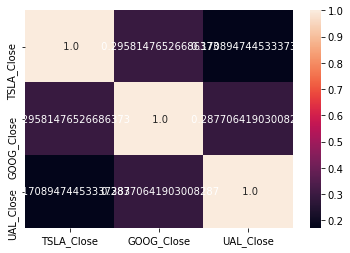

In [193]:
# correlation data plot
#my_port_corr.plot(rot=75,grid=True,kind='bar',xlabel='Portfolio',ylabel='Correlation')
sns.heatmap(my_port_corr,annot=True, fmt=" ")

In [194]:
# calculating rolling std
my_port_Rstd = my_port_daily.rolling(21).std()
my_port_Rstd.tail()

,TSLA_Close,GOOG_Close,UAL_Close
DateTime,,,
2019-04-25,0.027712,0.007082,0.014054
2019-04-26,0.028643,0.006474,0.014027
2019-04-29,0.029254,0.006456,0.014284
2019-04-30,0.029164,0.018950,0.014486
2019-05-01,0.027741,0.018906,0.014734


<AxesSubplot:title={'center':'Rolling STD W=21'}, xlabel='Portfolio', ylabel='STD'>

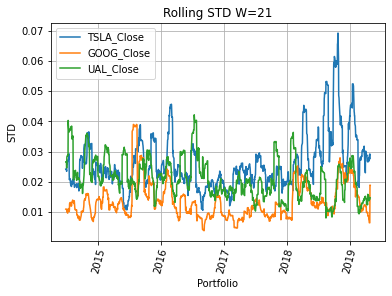

In [195]:
# plotting rolling std
my_port_Rstd.plot(rot=75,grid=True,title='Rolling STD W=21',xlabel='Portfolio',ylabel='STD')

In [200]:
# rolling covariance
rollingCov1 = TSLA.rolling(60).cov(joined_data['SP500Daily'])
#rollingCov1

In [201]:
#sharpe ratio of the new data
My_sharpe_ratio = my_port_daily.mean()/my_port_daily.std()
My_sharpe_ratio

TSLA_Close    0.016844
GOOG_Close    0.047432
UAL_Close     0.035641
dtype: float64

<AxesSubplot:xlabel='Portfolio', ylabel='Sharpe Ratio'>

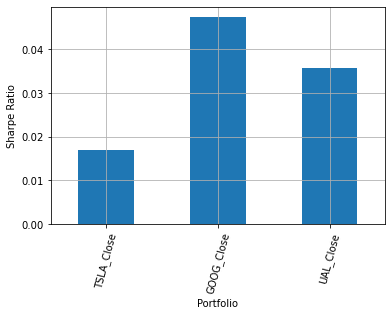

In [202]:
# sharpe ratio plot of new data
My_sharpe_ratio.plot(rot=75,grid=True,kind='bar',xlabel='Portfolio',ylabel='Sharpe Ratio')

###### GOOG and UAL outperformed Whale portfolio and all out performed S&P